In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.vigenere import *

from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
%matplotlib inline

In [3]:
challenge_number = 8
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

sca = sanitise(ca)
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
ptb = depunctuate(cb)

/home/neil/Programming/cipher-tools/support/plot_frequency_histogram.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


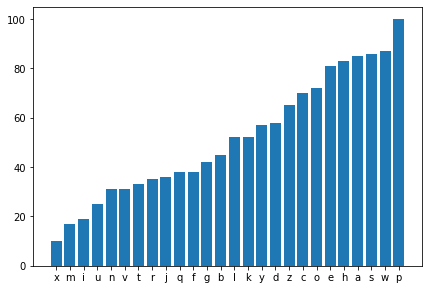

In [5]:
fc = collections.Counter(sca)
plot_frequency_histogram(fc, sort_key=fc.get)

In [6]:
kworda, score = vigenere_frequency_break(sca, fitness=Ptrigrams)
kworda

'low'

In [8]:
pa = vigenere_decipher(sca, kworda)
pa

'harrywemanagedtotapthephonelinesinosloandinterceptedgermanmilitarypolicereportstothessheadquarterstheyestablishedthatthegunnersideoperationwaseffectiveinwipingouttheexistingstocksofheavywaterbutthatthenaziengineerswereabletorestartproductionthiswasconfirmedincommunicationssmuggledoutoftheplantbyjomarbrunandeinnarskinnerlandthechiefengineeranddesigneroftheplantwhoarestillworkingthereassoeagentstheinformationwassenttointelligenceheadquartersinlondonintoothpastetubesusingacipherdevelopedforbossbyleomarksthisintelligencewaspassedtousaafwhostartedtodevelopaplantobombtheplantrunningtheriskofsignificantcivilianlossesluckilyoneofourbossofficialsspottedthemaponthewallofabriefingroomduringaprotocolvisitandrealisedwhatitwasheflaggedtheoperationandgotmeinvolvediwasabletocontactswallowviatheoslobranchofmilorgandwehavebeenworkingtogetherwithusaaftorefinethemissiondespitetheriskstheyagreedtoadaylightraidinthehopethattheaddedaccuracywouldreducenorwegiancasualtiesunfortunatelytheraidwasamixedsuccessas

In [9]:
fpa = lcat(tpack(segment(pa)))
print(fpa)

harry we managed to tap the phone lines in oslo and intercepted german military police reports to
the ss headquarters they established that the gunner side operation was effective in wiping out the
existing stocks of heavy water but that the nazi engineers were able to restart production this was
confirmed in communications smuggled out of the plant by jomar brun and e in nar skinner land the
chief engineer and designer of the plant who are still working there as soe agents the information
was sent to intelligence headquarters in london in toothpaste tubes using a cipher developed for
boss by leo marks this intelligence was passed to usaaf who started to develop a plan to bomb the
plant running the risk of significant civilian losses luckily one of our boss officials spotted the
map on the wall of a briefing room during a protocol visit and realised what it was he flagged the
operation and got me involved i was able to contact swallow via the oslo branch of mil org and we
have been wor

In [10]:
open(plaintext_a_filename, 'w').write(fpa)

1644

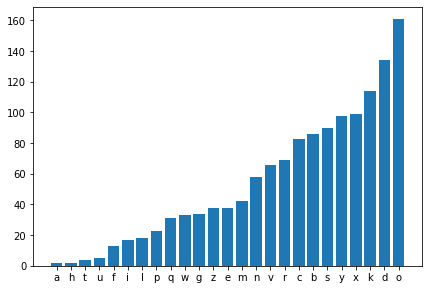

In [16]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [12]:
(kmb, kab, kob), score = affine_break(scb, fitness=Pletters)
kmb, kab, kob

(11, 5, True)

In [13]:
acb = affine_decipher(scb, kmb, kab, kob)
acb

'etmhbnboiagoriendvrmaokaswciroredudtiudrnlagyhingtvnoobesmetirxnetetahheatstcaqkuodornincsisotnhfgttinreapelsnlesiiptonottogwrsucpeahamnkwiguotronhsnaetterwgtchsiphaapdreebthoeoetnkrdshpryoeotwriastaotnnnhderietaaptltnethiermsltetehoetaesttahtkascwtnaorfeoenesnwoirantsirtpecdteeabcyieorvnrladflaoetthakatcgirnaacirsfmtehteoeatvrnuerfemdretohsmoisynieieewtesnstsesaatthntrittmeintletdocuvcaoeeprpeaordsdtiprhuttetactuakhtbtaermjyiottoefhlxepiossvoaerduintyrhtnteosdrweprdoptweiehhvrhiygcaacuocryhniteatnrptnelntaotltywhooternetisohhtoterwpeasottnniahdetefirncosreutdrucwtrhietosttowhdesofrtetohsalsahtutoesbmifbadldetaaomtgrehueebtiuldrteemieuercltyoslscfiaiialtonydnusrectwookesfyahvtwwaeeerropcrtdteetbsyheeevtnesooyrseffriconrcecdotrnebeeaowhvoeehvroetprwaepinltethslbafsnemedeaagndhadsitsoercndaditopnhnleaaterihsstoeipslbsiyiattuthonrieehemseaevasngtrwnokigiwitthndiincissunisotwfihcfoilirasdofmaiheliecmesrtnpoguhibtanesecdeeihddttafthiaectlhiylosuedubsothdewsnxntiitgksofscoahweveaytnroadstpa

In [14]:
(kwordb, fillb, emptyb), score = column_transposition_break_mp(acb, fitness=Ptrigrams)
(kwordb, fillb, emptyb), score

(((2, 0, 5, 1, 3, 8, 6, 4, 7), False, False), -4688.2791775857195)

In [15]:
pb = column_transposition_decipher(acb, kwordb, fillcolumnwise=fillb, emptycolumnwise=emptyb)
pb

'thebombingraidonvemorkwascarriedoutduringdaylightonnovembersixteenththeattacksquadronconsistingofthirteenplanessplitintotwogroupseachmakingtworunsonthetargetswhichappearedtobethenorskhydropowerstationandthenitrateplantthreemilestotheeasttheattackwasnotforeseennorwasitinterceptedbyaircoverandalloftheattackingaircraftseemtohavereturnedfromthemissioneyewitnessesstatethatintermittentcloudcoverappearedtodisrupttheattackbutthemajorityoftheexplosivesaroundthirtytonsweredroppedwithveryhighaccuracyonthenitrateplantonlytwotothreetonshitthepowerstationandthereinforcedstructurewithstoodtheworstoftheassaultthebombsfailedtodamagetherebuiltdeuteriumelectrolysisfacilityandournewstocksofheavywaterwereprotectedbythesevenstoreysofreinforcedconcreteabovehoweverthepowerplantitselfhasbeendamagedandthissecondraidontheplantraisesthepossibilitythatourenemieshaveagentsworkingwithinitindiscussionwithofficialsfromdiealchemistengroupithasbeendecidedthatthefacilityshouldbeshutdownexistingstocksofheavywaterandpotas

In [16]:
fpb = lcat(tpack(segment(pb)))
print(fpb)

the bombing raid on ve mork was carried out during daylight on november sixteenth the attack
squadron consisting of thirteen planes split into two groups each making two runs on the targets
which appeared to be the norsk hydropower station and the nitrate plant three miles to the east the
attack was not foreseen nor was it intercepted by air cover and all of the attacking aircraft seem
to have returned from the mission eyewitnesses state that intermittent cloud cover appeared to
disrupt the attack but the majority of the explosives around thirty tons were dropped with very high
accuracy on the nitrate plant only two to three tons hit the powerstation and the reinforced
structure withstood the worst of the assault the bombs failed to damage the rebuilt deuterium
electrolysis facility and our new stocks of heavy water were protected by the seven storeys of
reinforced concrete above however the powerplant itself has been damaged and this second raid on the
plant raises the possibility tha

In [17]:
open(plaintext_b_filename, 'w').write(fpb)

1686

In [18]:
transpositions[kwordb]

['clampdown']